In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#Cleaning the data
##################################################################################

#reading in the csv
df_teamstats = pd.read_csv("data/AmericanFootball98.csv")
df_sb = pd.read_csv("data/superbowl.csv")

df_teamstats.drop(df_teamstats.columns[33:], axis=1, inplace=True)
df_sb.drop(df_sb.columns[6:], axis=1, inplace=True)
df_sb.drop(0, inplace=True)

##################################################################################

#changes date to year
df_sb['Year'] = pd.to_datetime(df_sb['Date']).dt.year
df_sb.drop(labels = 'Date', axis=1, inplace=True)

#changes sb roman number to just int
df_sb['SB'] = df_sb['SB'].str.replace(r'[a-zA-Z]', '', regex=True)
df_sb['SB'] = df_sb['SB'].str.replace(r'\(|\)', '', regex=True)

#moves year
column_to_move = df_sb.pop("Year")
df_sb.insert(0, "Year", column_to_move)

##################################################################################

#Extracting the team names and years from df_teamstats
df_teamstats['Team'] = df_teamstats['team_code'].str.extract(r'([A-Za-z]{3})')
df_teamstats['Year'] = df_teamstats['team_code'].str.extract(r'(\d{4})')

#reorder columns
column_to_move = df_teamstats.pop("Year")
df_teamstats.insert(0, "Year", column_to_move)
column_to_move = df_teamstats.pop("Team")
df_teamstats.insert(1, "Team", column_to_move)

#Year str to int
df_teamstats['Year'] = df_teamstats['Year'].astype(int)

#delete team_code
df_teamstats = df_teamstats.drop('team_code', axis=1)

##################################################################################

#Dictionaries
sb_dict = {
    "New England Patriots":"Patriots", #won 4 from 2005-2019
    "Miami Dolphins":"Dolphins",
    "Buffalo Bills":"Bills",
    "New York Jets":"Jets",
    "Cincinnati Bengals":"Bengals",
    "Pittsburgh Steelers":"Steelers", #won 2 from 2005-2019
    "Baltimore Ravens":"Ravens", #won 1 from 2005-2019
    "Cleveland Browns": "Browns", #team has not been to the SB yet
    "Baltimore Colts":"Colts",
    "Indianapolis Colts":"Colts", #2nd Colts Team, #won 1 from 2005-2019
    "Jacksonville Jaguars":"Jaguars", #team has not been to the SB yet
    "Tennessee Titans":"Titans", 
    "Houston Texans":"Texans", #team has not been to the SB yet
    "Denver Broncos":"Broncos", #won 1 from 2005-2019
    "Kansas City Chiefs":"Chiefs",
    "San Diego Chargers":"Chargers", #omitted LA Chargers, no SB appearance
    "Oakland Raiders":"Raiders", #omitted LV Raiders, no SB appearance
    "Los Angeles Raiders":"Raiders", #2nd Raiders Team
    "New York Giants":"Giants", #won 2 from 2005-2019
    "Washington Redskins":"Redskins", #omitted Commanders, no SB appearance
    "Dallas Cowboys":"Cowboys",
    "Philadelphia Eagles":"Eagles", #won 1 from 2005-2019
    "Chicago Bears":"Bears",
    "Minnesota Vikings":"Vikings",
    "Detroit Lions":"Lions", #team has not been to SB yet
    "Green Bay Packers":"Packers", #won 1 from 2005-2019
    "Tampa Bay Buccaneers":"Buccaneers",
    "Carolina Panthers":"Panthers",
    "Atlanta Falcons":"Falcons",
    "New Orleans Saints":"Saints", #won 1 from 2005-2019
    "Seattle Seahawks":"Seahawks", #won 1 from 2005-2019
    "St. Louis Rams":"Rams",
    "Los Angeles Rams":"Rams", #2nd Rams Team
    "Arizona Cardinals":"Cardinals",
    "San Francisco 49ers":"49ers"
}

team_dict = {
    "nwe": "Patriots",
    "mia":"Dolphins",
    "buf":"Bills",
    "nyj":"Jets",
    "cin":"Bengals",
    "pit":"Steelers",
    "rav":"Ravens",
    "cle":"Browns",
    "clt":"Colts",
    "jax":"Jaguars",
    "oti":"Titans",
    "htx":"Texans",
    "den":"Broncos",
    "kan":"Chiefs",
    "sdg":"Chargers",
    "rai":"Raiders",
    "nyg":"Giants",
    "was":"Redskins",
    "dal":"Cowboys",
    "phi":"Eagles",
    "chi":"Bears",
    "min":"Vikings",
    "det":"Lions",
    "gnb":"Packers",
    "tam":"Buccaneers",
    "car":"Panthers",
    "atl":"Falcons",
    "nor":"Saints",
    "sea":"Seahawks",
    "ram":"Rams",
    "crd":"Cardinals",
    "sfo":"49ers"
}

##################################################################################

#changes team names to mascots
df_sb['Winner'] = df_sb['Winner'].replace(sb_dict)
df_sb['Loser'] = df_sb['Loser'].replace(sb_dict)

df_teamstats['Team'] = df_teamstats['Team'].replace(team_dict)

##################################################################################

# drop all rows from 2004 and older
df_sb = df_sb[df_sb['Year'] > 2004]
df_teamstats = df_teamstats[df_teamstats['Year'] > 2004]

#merging df together
df_merged = pd.merge(df_teamstats, df_sb, on='Year', how='left')

##################################################################################

mascottocode = {
    "Patriots": 1,
    "Dolphins": 2,
    "Bills":3,
    "Jets":4,
    "Bengals":5,
    "Steelers":6,
    "Ravens":7,
    "Browns":8,
    "Colts":9,
    "Jaguars":10,
    "Titans":11,
    "Texans":12,
    "Broncos":13,
    "Chiefs":14,
    "Chargers":15,
    "Raiders":16,
    "Giants":17,
    "Redskins":18,
    "Cowboys":19,
    "Eagles":20,
    "Bears":21,
    "Vikings":22,
    "Lions":23,
    "Packers":24,
    "Buccaneers":25,
    "Panthers":26,
    "Falcons":27,
    "Saints":28,
    "Seahawks":29,
    "Rams":30,
    "Cardinals":31,
    "49ers":32
}
codetomascot = {
    1:"Patriots",
    2:"Dolphins",
    3:"Bills",
    4:"Jets",
    5:"Bengals",
    6:"Steelers",
    7:"Ravens",
    8:"Browns",
    9:"Colts",
    10:"Jaguars",
    11:"Titans",
    12:"Texans",
    13:"Broncos",
    14:"Chiefs",
    15:"Chargers",
    16:"Raiders",
    17:"Giants",
    18:"Redskins",
    19:"Cowboys",
    20:"Eagles",
    21:"Bears",
    22:"Vikings",
    23:"Lions",
    24:"Packers",
    25:"Buccaneers",
    26:"Panthers",
    27:"Falcons",
    28:"Saints",
    29:"Seahawks",
    30:"Rams",
    31:"Cardinals",
    32:"49ers"
}

##################################################################################

#changing mascot to code number
df_merged['Team'] = df_merged['Team'].replace(mascottocode)
df_merged['Winner'] = df_merged['Winner'].replace(mascottocode)
df_merged['Loser'] = df_merged['Loser'].replace(mascottocode)

##################################################################################

# converting time to float
def convert_to_float(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes + seconds / 60

# Apply the conversion to the entire column
df_merged['avg time per drive'] = df_merged['avg time per drive'].apply(convert_to_float)

In [3]:
# Assuming df_merged has columns 'Team' and 'Winner' and you want to create a new 'WinSB' column
df_merged['WinSB'] = df_merged.apply(lambda row: row['Team'] == row['Winner'], axis=1)


c:\Users\divin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\divin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\divin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\divin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

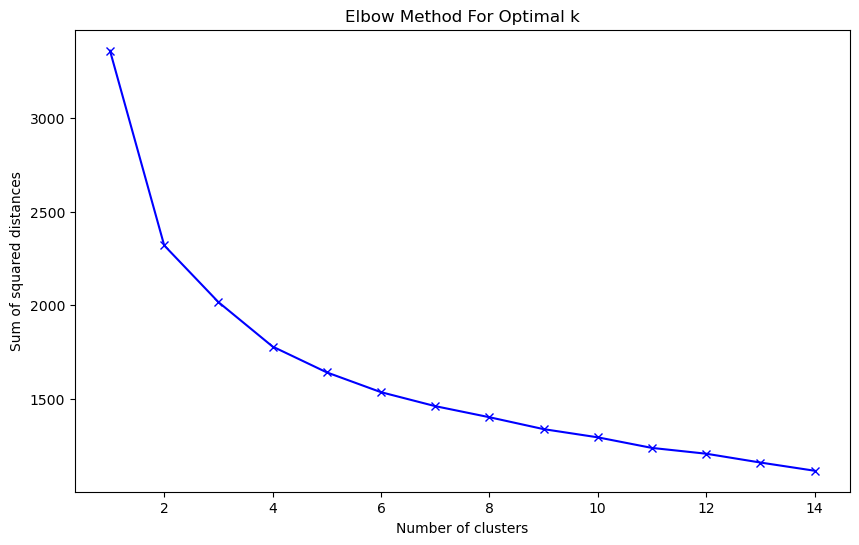

In [4]:
features = df_merged[['wins', 'plays', 'TO', 'Fumbles Lost', 'completions', 'turnover percentage', 'avg time per drive']]

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determining the optimal number of clusters using the Elbow Method
ssd = []  # Sum of squared distances
K = range(1, 15)  # Example range, adjust based on your dataset size and complexity
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(features_scaled)
    ssd.append(km.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

c:\Users\divin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\divin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster
2    133
3    129
1    117
0    101
Name: count, dtype: int64


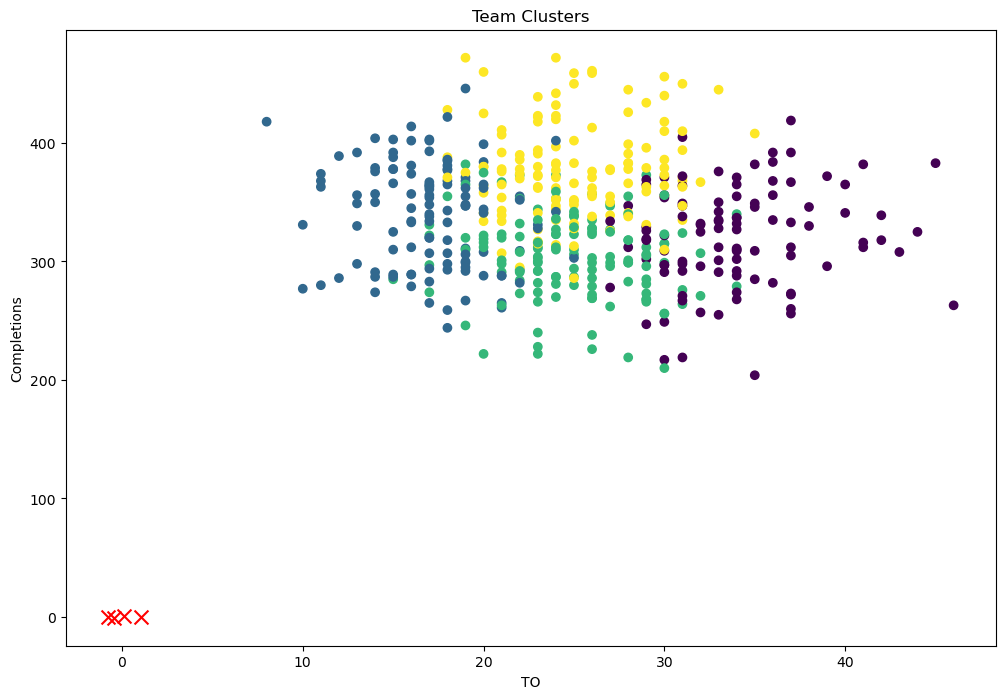

In [5]:
# Selected number of clusters from the Elbow Method
optimal_k = 4

# Apply K-Means Clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster information back to the dataframe
df_teamstats['Cluster'] = clusters

# Now you can analyze your teams by the cluster they were assigned to.
# You might want to inspect the central features of each cluster, which can be done by checking the cluster centers:
cluster_centers = kmeans.cluster_centers_

# For further analysis, you can examine the distribution of teams across the clusters
cluster_distribution = df_teamstats['Cluster'].value_counts()
print(cluster_distribution)



# Example using 'total_yards' and 'points_for' features for the plot
plt.figure(figsize=(12, 8))
plt.scatter(df_teamstats['TO'], df_teamstats['completions'], c=df_teamstats['Cluster'], cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=100, marker='x')  # cluster centers
plt.title('Team Clusters')
plt.xlabel('TO')
plt.ylabel('Completions')
plt.show()

c:\Users\divin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\divin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


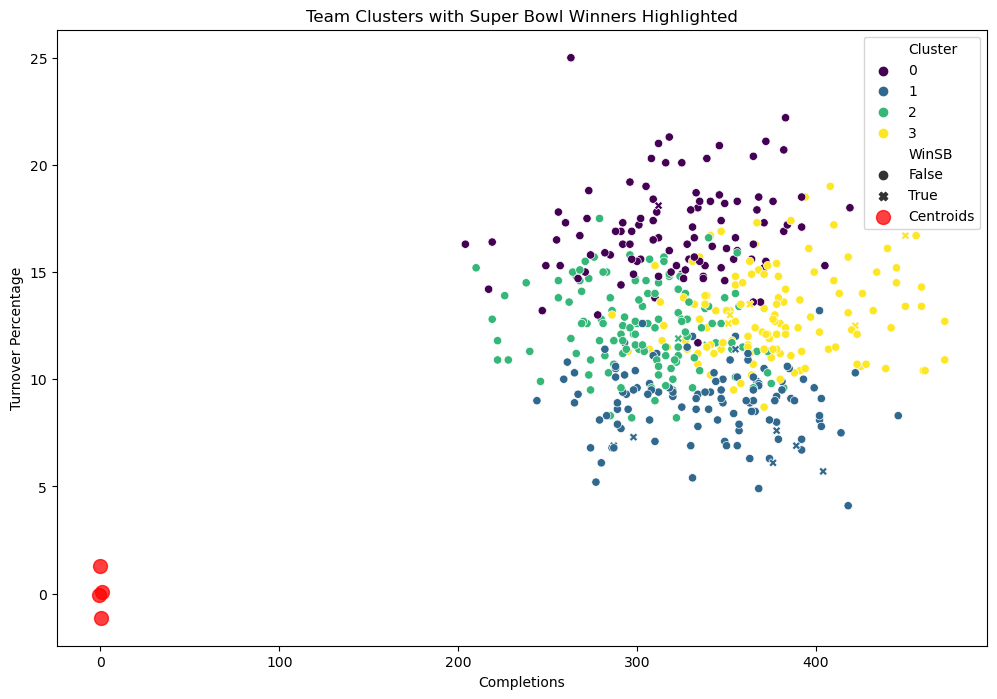

In [6]:
import seaborn as sns
winner_column = 'Winner'  # Column name for Super Bowl winners in df_merged

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-Means Clustering
optimal_k = 4  # Use the optimal number of clusters determined from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_merged['Cluster'] = kmeans.fit_predict(features_scaled)

# Mark Super Bowl winning teams
# df_merged['SB_Winner'] = df_merged[winner_column].notnull()

# Choose two features to plot (e.g., 'completions' and 'turnover percentage')
x_feature = 'completions'
y_feature = 'turnover percentage'

# Plot the clusters with Super Bowl winners highlighted
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_feature, y=y_feature, data=df_merged,
                hue='Cluster', style='WinSB', markers=['o', 'X'], palette='viridis')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, features.columns.get_loc(x_feature)], 
            centers[:, features.columns.get_loc(y_feature)], 
            c='red', s=100, alpha=0.75, label='Centroids')

plt.title('Team Clusters with Super Bowl Winners Highlighted')
plt.xlabel('Completions')
plt.ylabel('Turnover Percentage')
plt.legend()
plt.show()

In [7]:
X = features
# Normalize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Now, use the clusters as a feature for SVM classification
df_merged['Cluster'] = clusters  # Make sure to use your actual dataframe name
y = df_merged['Cluster']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM model for classification
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict the classification for a new scaled data point
new_data_point = scaler.transform([[5, 3, 1, 5, 6, 9, 1]])  # Example: 5 wins, 3 losses, 0 ties
predicted_cluster = svm_model.predict(new_data_point)
print("Predicted Cluster for New Data Point:", predicted_cluster)

# Predict if this hypothetical team would win the Super Bowl according to the SVM model
teams_in_cluster = df_merged[df_merged['Cluster'] == predicted_cluster[0]]['Team'].tolist()
print("Teams in Predicted Cluster:", teams_in_cluster)

c:\Users\divin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\divin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Accuracy: 0.96875
Predicted Cluster for New Data Point: [2]
Teams in Predicted Cluster: [4, 6, 8, 18, 23, 2, 3, 4, 8, 31, 2, 4, 5, 11, 12, 16, 18, 21, 2, 8, 13, 26, 30, 32, 2, 10, 25, 30, 4, 8, 10, 11, 16, 25, 30, 4, 2, 3, 10, 16, 20, 25, 30, 2, 8, 11, 10, 22, 2, 3, 11, 10, 9, 13, 16, 14, 21, 22, 31, 29, 30, 8, 11, 16, 13, 18, 21, 29, 32, 31, 4, 3, 8, 11, 16, 14, 20, 18, 21, 26, 25, 32, 5, 8, 16, 14, 22, 21, 23, 29, 30, 3, 4, 8, 15, 13, 22, 26, 27, 32, 3, 5, 11, 12, 14, 13, 20, 17, 26, 25, 32, 2, 3, 8, 12, 16, 18, 21, 22, 23, 26, 27, 32]


c:\Users\divin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


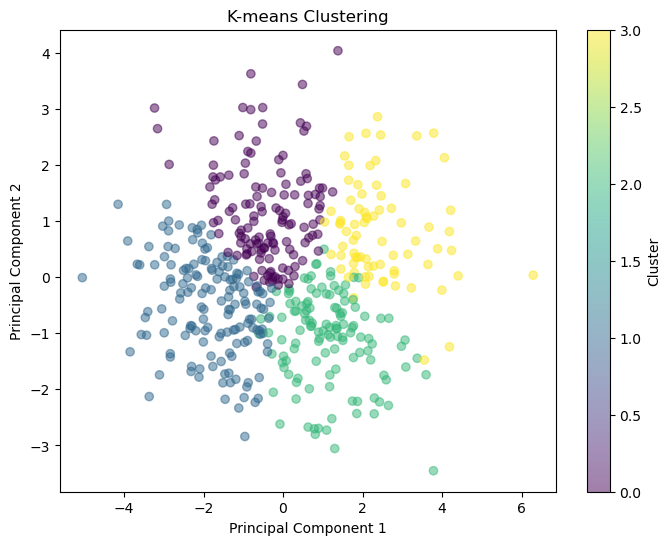

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

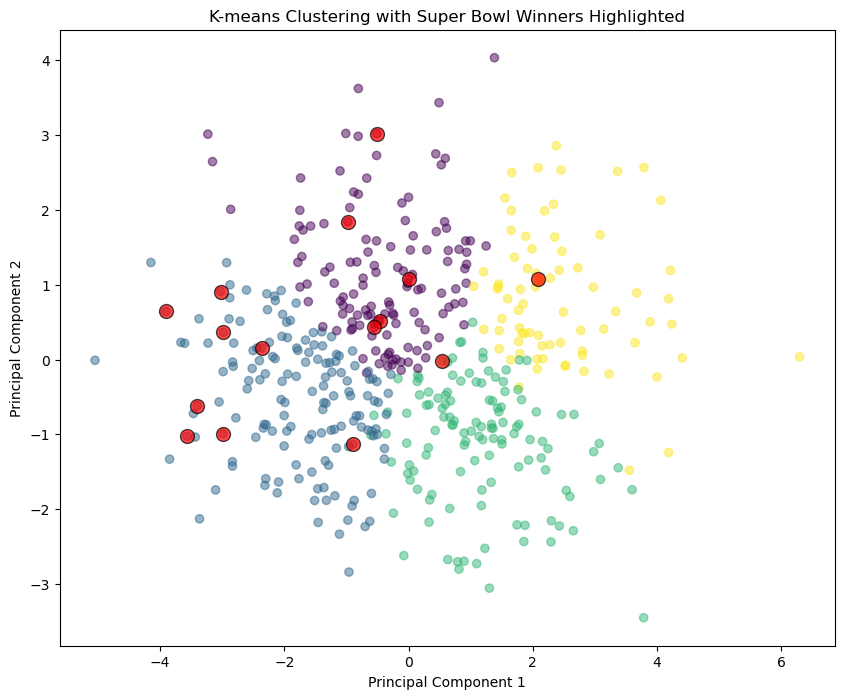

In [9]:
# Perform PCA for visualization
pca = PCA(n_components=2)  # Reduce to 2 components for 2D visualization
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the DataFrame
df_merged['PCA1'] = X_pca[:, 0]
df_merged['PCA2'] = X_pca[:, 1]

# Re-plot with winners highlighted
plt.figure(figsize=(10, 8))
# Plot all teams
plt.scatter(df_merged['PCA1'], df_merged['PCA2'], c=df_merged['Cluster'], cmap='viridis', alpha=0.5)
# Overlay Super Bowl winners in red
winners = df_merged[df_merged['WinSB'] == 1]
plt.scatter(winners['PCA1'], winners['PCA2'], c='red', edgecolor='k', alpha=0.7, s=100, label='Super Bowl Winner')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with Super Bowl Winners Highlighted')
plt.show()

       wins     plays        TO  Fumbles Lost  completions  \
0  0.119803  0.767376  0.012608     -0.043390     0.873658   
1  0.776863 -0.066434 -1.035990     -0.758670    -0.092563   
2 -0.597831 -0.805304  0.326655      0.192336    -0.792560   
3 -0.780887  0.122698  1.508117      1.270296    -0.027811   

   turnover percentage  avg time per drive  
0             0.066184            0.369084  
1            -1.004704            0.585324  
2             0.257741           -0.874155  
3             1.465844           -0.379524  
Cluster 0 statistics:
                        count         mean         std          min  \
Year                    130.0  2012.800000    3.886769  2005.000000   
Team                    130.0    16.300000    9.134355     1.000000   
wins                    130.0     8.353846    2.328993     2.000000   
losses                  130.0     7.584615    2.338702     3.000000   
PF                      130.0   381.138462   58.781260   246.000000   
yards           

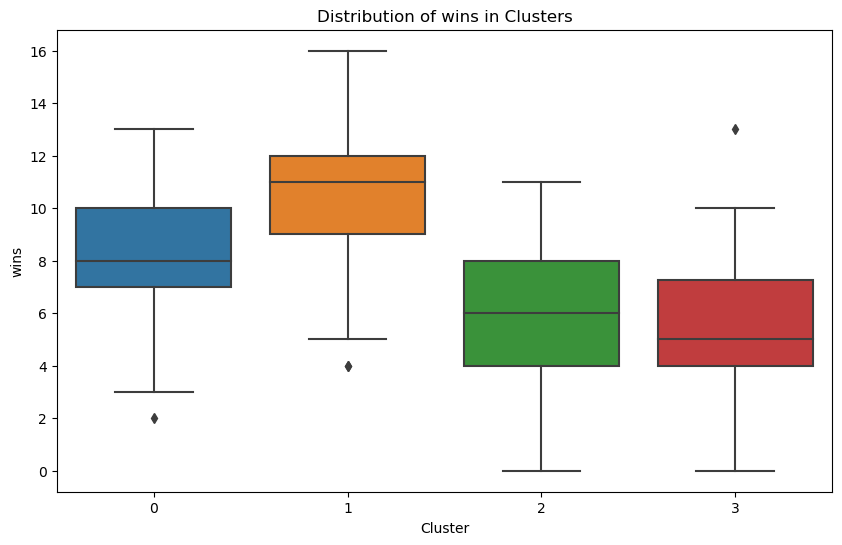

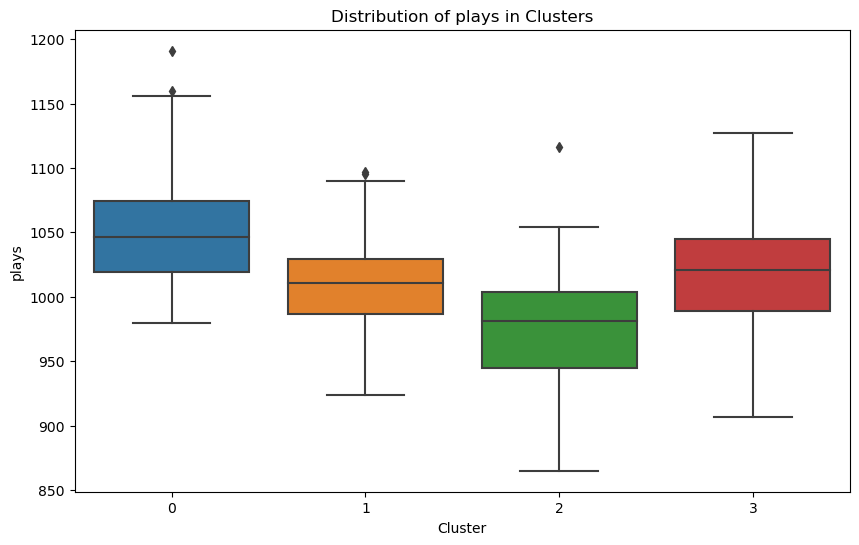

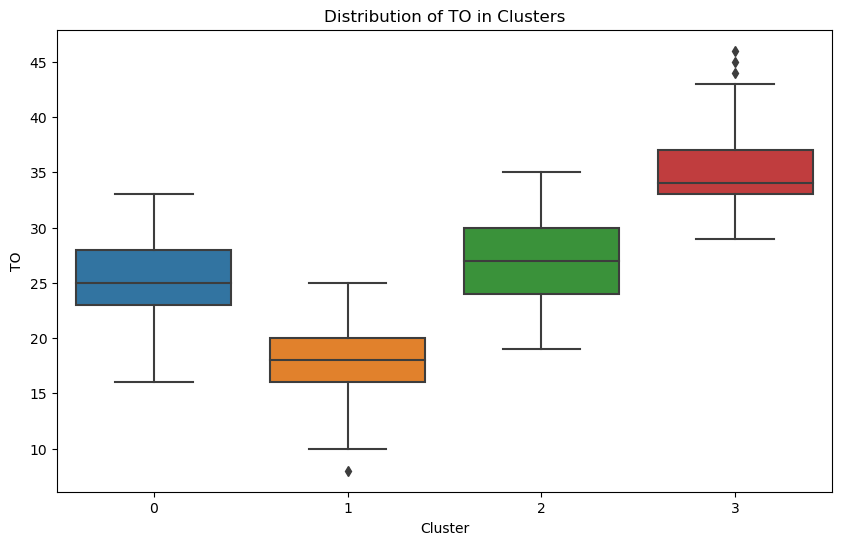

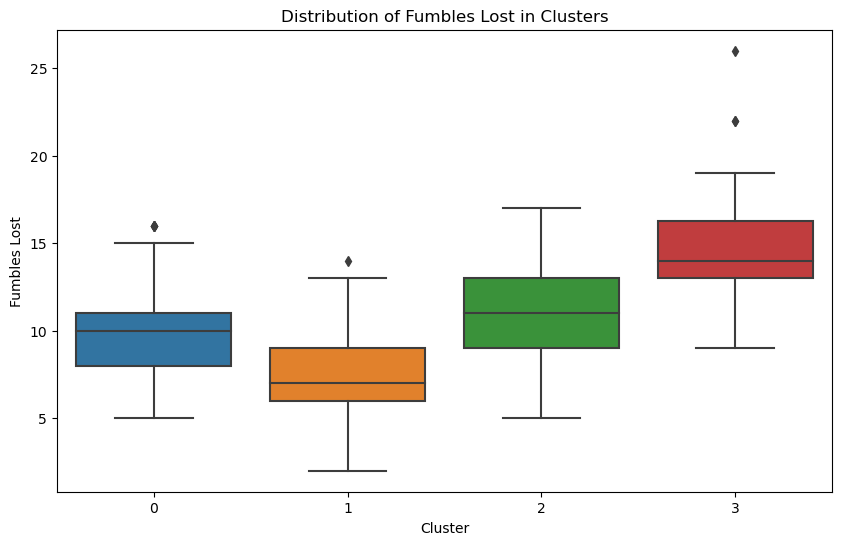

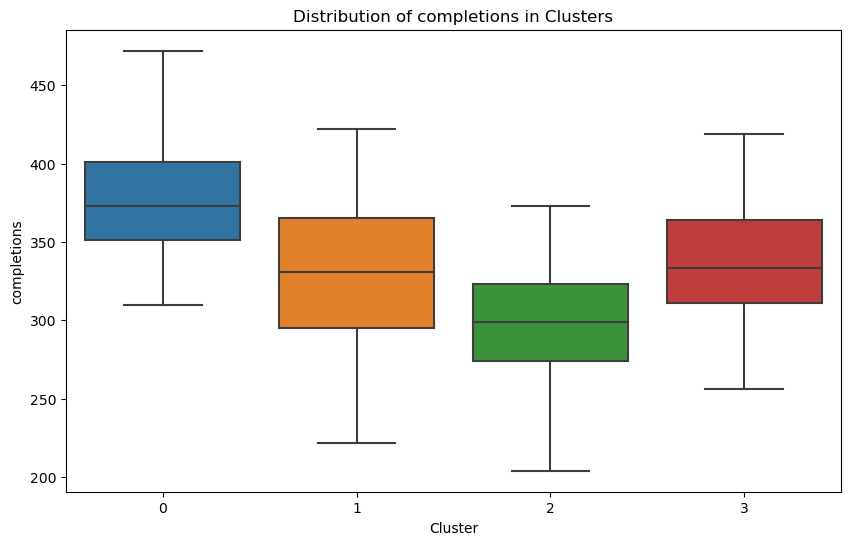

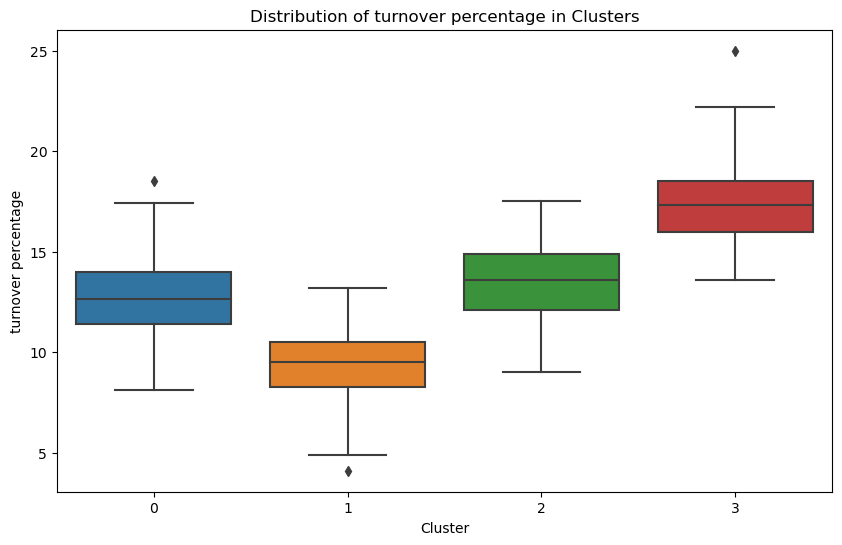

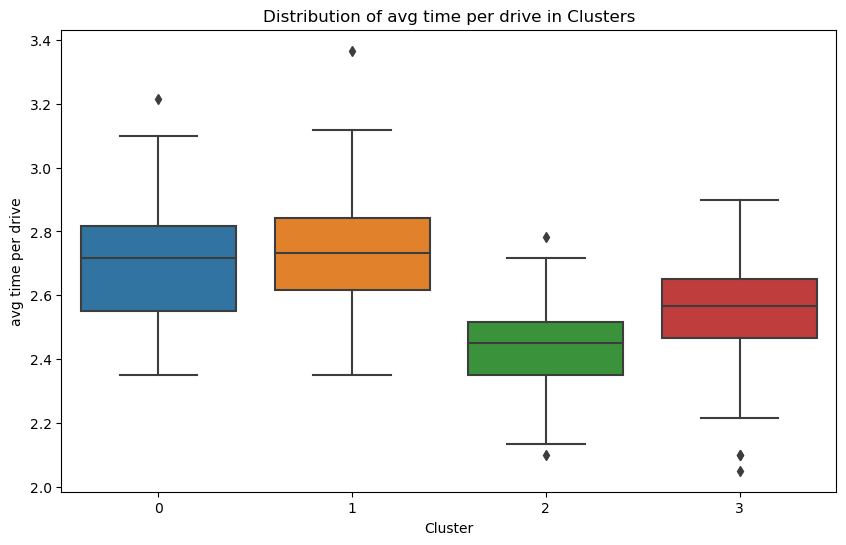

In [10]:
# Assuming 'kmeans' is your trained KMeans model and 'df_merged' is your data
cluster_centers = kmeans.cluster_centers_

# Map the cluster centers back to the feature space
features = ['wins', 'plays', 'TO', 'Fumbles Lost', 'completions', 'turnover percentage', 'avg time per drive']
centers_df = pd.DataFrame(cluster_centers, columns=features)
print(centers_df)

# Examine statistical profiles of each cluster
for cluster in sorted(df_merged['Cluster'].unique()):
    print(f"Cluster {cluster} statistics:")
    cluster_data = df_merged[df_merged['Cluster'] == cluster]
    stats = cluster_data.describe().transpose()
    print(stats)
    print("\n")

# Optional: Visualize the feature distributions for each cluster
import seaborn as sns
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df_merged)
    plt.title(f"Distribution of {feature} in Clusters")
    plt.show()


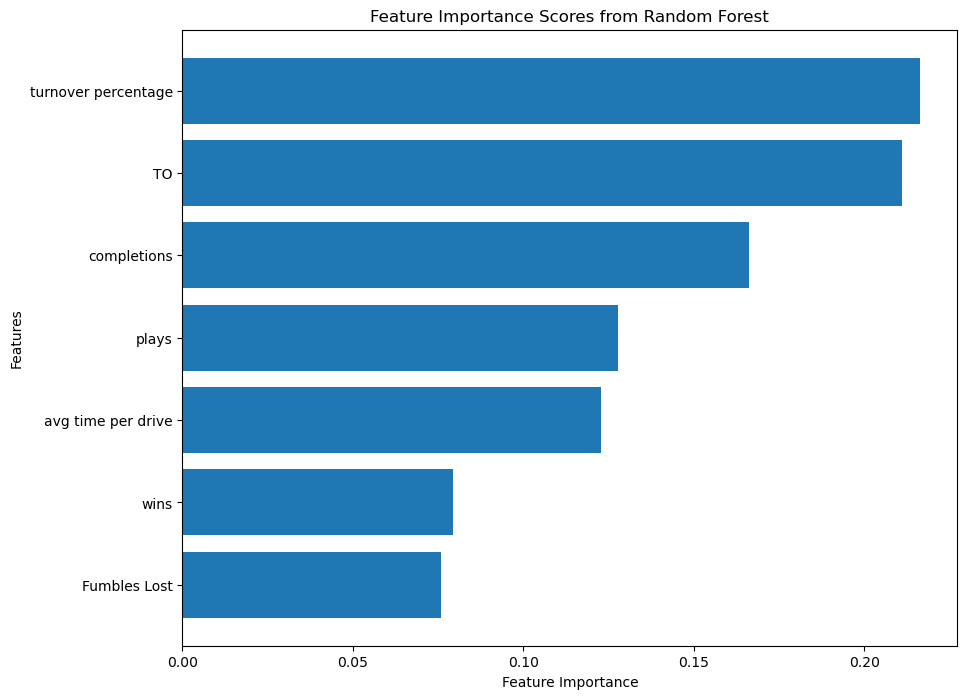

In [11]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'X' is your feature matrix and 'clusters' are your cluster labels obtained from a clustering algorithm
# Ensure 'X' is a DataFrame with column names for feature labels, and 'clusters' is a Series or list-like object

# Initialize and fit the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, clusters)

# Get feature importance scores
feature_importances = rf.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
features_df = features_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Scores from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()
